In [14]:
import numpy as np
import my_umap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import plotly.express as px
from sklearn.decomposition import PCA
mpl.rcParams['figure.dpi'] = 300

In [15]:
loaded = np.load('data/in10_split_converted.npz', allow_pickle=True)
x = loaded['x_train']
y = loaded['y_train']
x.shape, y.shape

((10000, 5096), (10000,))

In [16]:
cl_dict = {0: 'african_elephant',
           1: 'agaric',
           2: 'eastern_grey_squirrel',
           3: 'hawk',
           4: 'koala',
           5: 'lichen',
           6: 'meerkat',
           7: 'phlox',
           8: 'tamandua',
           9: 'wasp_s_nest'}

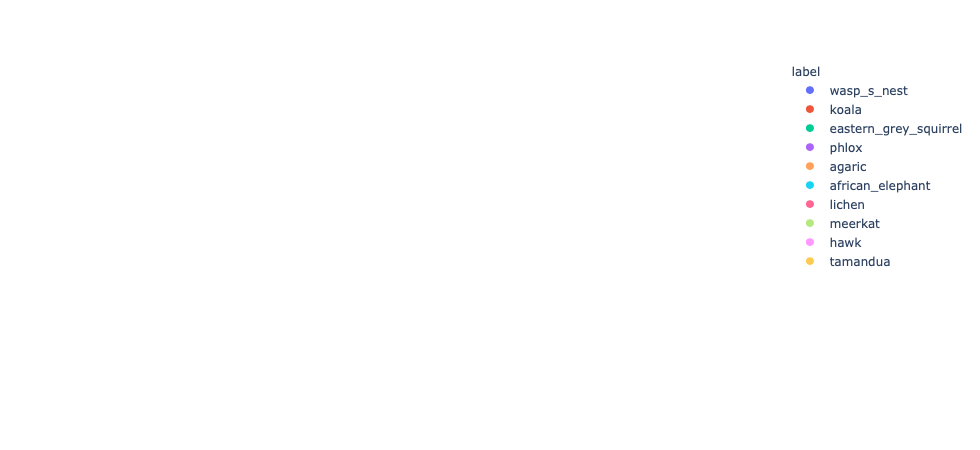

In [17]:
p = my_umap.MyUMAP(n_components=3, random_state=69)
p.fit(x)
proj = p.transform(x)
df = pd.DataFrame(dict(x=proj[:, 0], y=proj[:, 1], z=proj[:, 2], label=[cl_dict[int(el)] for el in y]))
groups = df.groupby('label')
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')
fig.show()

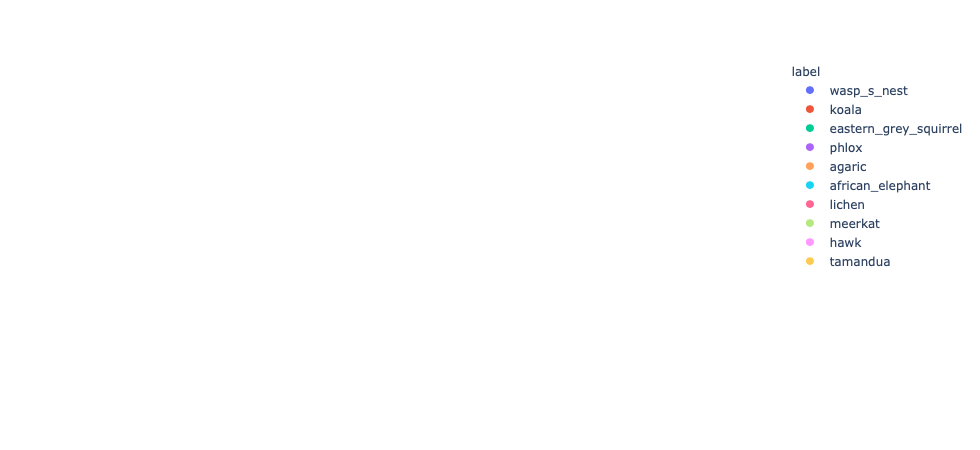

In [18]:
pca = PCA(n_components=3, random_state=69)
pca.fit(x)
proj = pca.transform(x)
df = pd.DataFrame(dict(x=proj[:, 0], y=proj[:, 1], z=proj[:, 2], label=[cl_dict[int(el)] for el in y]))
groups = df.groupby('label')
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')
fig.show()